# 2.1 머신러닝 알고리즘 - LR, DT, RF
- Linear Regression
- Decision Tree
- Random Forests
- Logistic Regression (for Categorical Target)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'

# YONG's local data path
# dataPath = 'C:/YONG/m1710/myPydata/'

In [2]:
# test reading data
d1 = pd.read_csv(dataPath + 'UCI_credit_card.csv')
d1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### 선형회귀분석

In [3]:
# For Linear Regression, Load Sample Data

from pandas import DataFrame

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

print(df.shape)
df.head()


(24, 5)


,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [4]:
#  다음달의 지수를 예측하는 구성으로 구조 변경

nd_SIP = np.array(df.Stock_Index_Price[1:]) # SIP of the next month
df = df.head(23)
df['Stock_Index_Price'] = nd_SIP
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1394
1,2017,11,2.50,5.3,1357
2,2017,10,2.50,5.3,1293
3,2017,9,2.50,5.3,1256
4,2017,8,2.50,5.4,1254


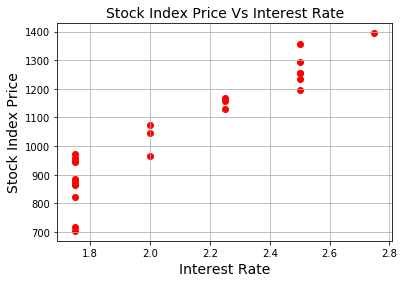

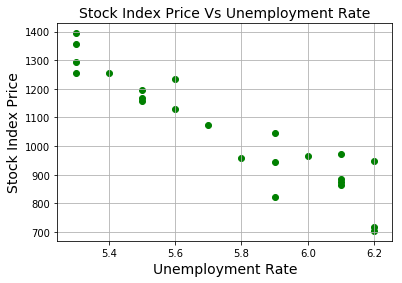

In [5]:
# 시각적인 linearity check - 사전적인 분포확인 : 탐색적 데이터 분석

plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

### 단순선형회귀분석 (Simple Linear Regression)

Intercept:   -48.116700201207095
Coefficients:   527.5975855130785


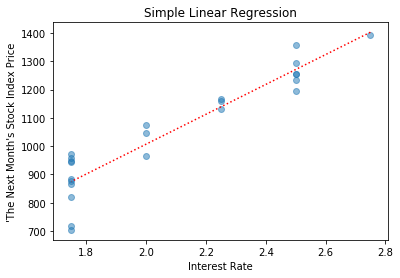

In [6]:
# Simple Linear Regression

from pandas import DataFrame
from sklearn import linear_model

X = df[['Interest_Rate']]
# 독립변수의 리스트로 정의. 
# 하지만, 내용물은 하나 뿐이기에 단순선형회귀분석
Y = df['Stock_Index_Price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept:  ', regr.intercept_)
print('Coefficients:  ', regr.coef_[0]) 
# 리스트이기 때문에 0번 요소를 출력해야 숫자

# make predictions - back test
predictions = regr.predict(X)


# 시각적으로 선형회귀분석 결과 확인
plt.scatter(X,Y,  alpha=0.5)
plt.plot(X,predictions, color='red', linestyle=':')
plt.xlabel('Interest Rate')
plt.ylabel("'The Next Month's Stock Index Price")
plt.title('Simple Linear Regression')
plt.show()


#### [Quiz] Unemployment Rate에 대한 선형회귀분석을 실시하라

### 다중선형회귀분석 Multiple Linear Regression

In [7]:
from pandas import DataFrame
from sklearn import linear_model

X = df[['Interest_Rate','Unemployment_Rate']] 
# here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept:  ', regr.intercept_)
print('Coefficients:  ', regr.coef_)


# prediction with new values
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('\nPredicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))


Intercept:   2086.4847782457537
Coefficients:   [ 282.73906776 -281.83113322]

Predicted Stock Index Price: 
 [1370.3122085]


In [8]:
import statsmodels.api as sm

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

# 회귀분석 결과의 출력
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     98.31
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           4.50e-11
Time:                        10:54:13   Log-Likelihood:                -126.32
No. Observations:                  23   AIC:                             258.6
Df Residuals:                      20   BIC:                             262.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2086.4848    803.82

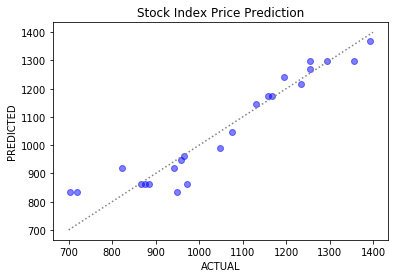

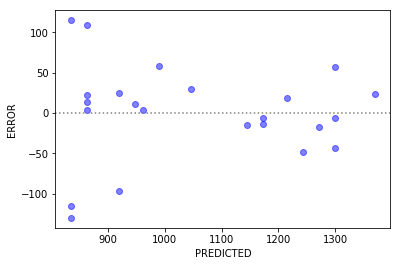

In [9]:
# investigate predictions

plt.scatter(Y, predictions, color='blue', alpha=0.5)
plt.plot([700,1400],[700,1400], 
         color='grey', linestyle=':')
plt.xlabel('ACTUAL')
plt.ylabel('PREDICTED')
plt.title('Stock Index Price Prediction')
plt.show()

# Prediction - Error
# c.f. conventionally put predicted into Y-axis
plt.scatter(predictions, Y-predictions, color='blue', alpha=0.5)
plt.axhline(0, color='grey', linestyle=':')
plt.xlabel('PREDICTED')
plt.ylabel('ERROR')
plt.show()

- [WARNING] 실전에서 이렇게 초보적 단순한 방식은 초기용의 단순 참고용 정도로만 사용.

#### GUI used for the Multiple Linear Regression in Python

In [10]:
# ref :: https://datatofish.com/multiple-linear-regression-python/

from pandas import DataFrame
from sklearn import linear_model
import tkinter as tk 
import statsmodels.api as sm

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }


df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 input variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price'] # output variable (what we are trying to predict)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 


# tkinter GUI
root= tk.Tk() 
 
canvas1 = tk.Canvas(root, width = 1200, height = 450)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# with statsmodels
print_model = model.summary()
label_model = tk.Label(root, text=print_model, justify = 'center', relief = 'solid', bg='LightSkyBlue1')
canvas1.create_window(800, 220, window=label_model)


# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type Interest Rate: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type Unemployment Rate: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)


def values(): 
    global New_Interest_Rate #our 1st input variable
    New_Interest_Rate = float(entry1.get()) 
    
    global New_Unemployment_Rate #our 2nd input variable
    New_Unemployment_Rate = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Stock Index Price: ', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Stock Index Price',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 
# GUI object will pop up
root.mainloop()

Intercept: 
 1798.403977625855
Coefficients: 
 [ 345.54008701 -250.14657137]


### Load Virtual Customer Transaction Summary dataset

#### about Customer Transaction Summary dataset
- 가상적인 신용카드사 또는 종합쇼핑몰 의 거래내역을 기초 집계해서 생성한 데이터
- 카테고리들을 자신의 업종에 대입한다면 (상품군 - 예: 보험이라면 장기, 단기, 종합 등) 

In [11]:
# contains only female customers
print(dataPath)
dfc20 = pd.read_csv(dataPath + 'dfc20bs.csv')
print(dfc20.columns)
list_feat = ['custid','age','amt_nike', 'amt_hnm','amt_strbk','amt_dgt','amt_book','amt_htl', 'amt_prmmsneakers', 
             'cnt_pstyr', 'cnt_login',
             'amt_nxtyr', 'cnt_nxtyr']

dfc21 = dfc20[dfc20.sex=='F'][list_feat]
print(dfc21.shape)
dfc21.head()

https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/
Index(['Unnamed: 0', 'custid', 'sex', 'age', 'area', 'education', 'marital',
       'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book', 'amt_htl',
       'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login', 'amt_nxtyr', 'cnt_nxtyr'],
      dtype='object')
(5000, 13)


,custid,age,amt_nike,amt_hnm,amt_strbk,amt_dgt,amt_book,amt_htl,amt_prmmsneakers,cnt_pstyr,cnt_login,amt_nxtyr,cnt_nxtyr
0,1,27,25100,0,20000,0,0,0,0,4,15,185921,3
1,2,28,21500,0,21700,0,0,0,0,3,17,271796,8
2,3,27,0,0,20200,0,0,0,0,2,16,369348,3
3,4,27,0,0,0,0,0,0,0,2,10,387005,8
4,5,27,20100,0,34000,0,0,0,76700,4,22,204884,10


In [12]:
print('Column Descriptions\n=======================')
print(dfc21.columns)
print(['고객번호', '연령', '나이키구매액', '스타벅스구매액', '디지털구매액', '서적구매액', '호텔구매액','프리미엄스니커즈구매액','구매건수','로그인건수','다음해구매금액','다음해구매건수'])

Column Descriptions
Index(['custid', 'age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
       'amt_book', 'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login',
       'amt_nxtyr', 'cnt_nxtyr'],
      dtype='object')
['고객번호', '연령', '나이키구매액', '스타벅스구매액', '디지털구매액', '서적구매액', '호텔구매액', '프리미엄스니커즈구매액', '구매건수', '로그인건수', '다음해구매금액', '다음해구매건수']


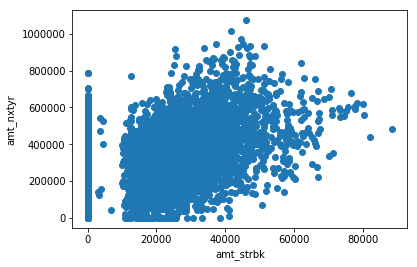

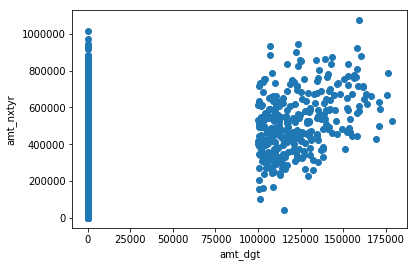

In [13]:
# EDA

plt.scatter(dfc21.amt_strbk, dfc21.amt_nxtyr)
plt.xlabel('amt_strbk')
plt.ylabel('amt_nxtyr')
plt.show()

plt.scatter(dfc21.amt_dgt, dfc21.amt_nxtyr)
plt.xlabel('amt_dgt')
plt.ylabel('amt_nxtyr')
plt.show()

### [실습]
- 전년의 이용금액과 다음해의 이용금액간의 관계를 시각적으로 확인하라

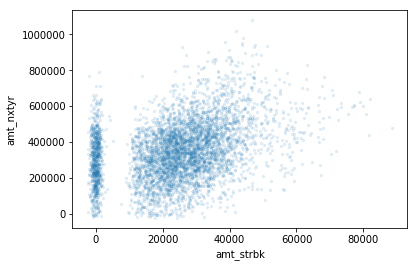

In [14]:
# 실전적인 EDA scatterplot

plt.scatter(rjitt(dfc21.amt_strbk), rjitt(dfc21.amt_nxtyr), 
            alpha=0.1, s=5)
plt.xlabel('amt_strbk')
plt.ylabel('amt_nxtyr')
plt.show()

# Linear Relationship?

[Remember!]
- 실전에서는 데이터의 양이 많아서 많은 수의 점을 표시해야한다
- 점들이 겹치는 경우가 흔하다
- 밀도를 파악하는 것도 중요하다

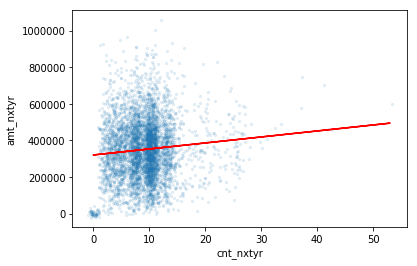

correlation =  0.08767


In [15]:
# 실전적인 EDA scatterplot

from sklearn import linear_model

regr = linear_model.LinearRegression()
X, Y = dfc21[['cnt_nxtyr']],dfc21.amt_nxtyr
regr.fit(X, Y)
predictions = regr.predict(X)

plt.scatter(rjitt(dfc21.cnt_nxtyr), rjitt(Y), 
            alpha=0.1, s=5)
plt.plot(X, predictions, color='red')
plt.xlabel('cnt_nxtyr')
plt.ylabel('amt_nxtyr')
plt.show()

print('correlation = ', round(np.corrcoef(dfc21.cnt_nxtyr, dfc21.amt_nxtyr)[0,1],5))
# Linear Relationship?

### [실습] 
- Customer Transaction Summary 의 다음해 구매금액을 예측하는 다중선형회귀분석을 실시

### Decision Tree

['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book', 'amt_htl', 'amt_prmmsneakers']

DT Predicting  amt_nxtyr   : 


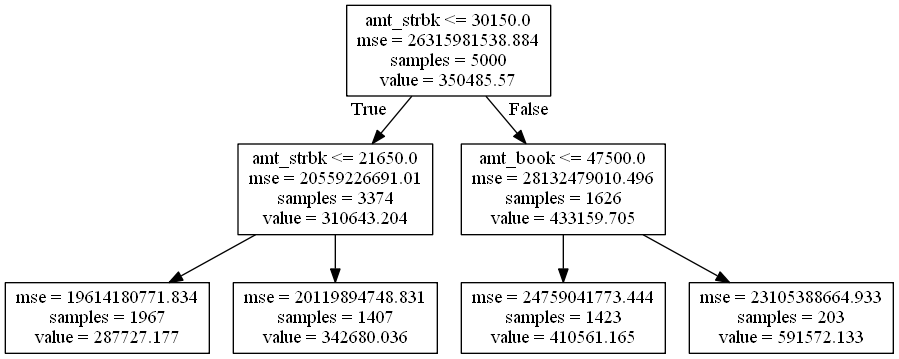

In [16]:
from sklearn.tree import DecisionTreeRegressor

# 사용할 독립변수와 종속변수 정의
dtfeatures = [elem for elem in list_feat if elem not in ['custid', 'cnt_pstyr', 'cnt_login', 'amt_nxtyr', 'cnt_nxtyr']]
print(dtfeatures)
tgt = 'amt_nxtyr'

dfdt = dfc21.copy()

dt1 = DecisionTreeRegressor(min_samples_split=30, 
                            max_depth=2, 
                            min_samples_leaf=10, 
                            random_state=99)
dt1.fit(dfdt[dtfeatures], dfdt[tgt])

# path should have set
# or [ InvocationException: GraphViz's executables not found ] occur 
# graphviz 가 존재하는 path를 정확하게 지정해 주어야 DT 플롯 생성됨

import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Anaconda3\\Library\\bin\\graphviz'

from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

print('\nDT Predicting ',tgt, '  : ')
# Show graph
Image(graph.create_png())

[트리 옵션 참고]
- min_samples_split=30   # split이 이루어지기 위해 parent node가 가져야하는 최소 sample size
- max_depth=2  # root를 제외하고 얼마나 깊이 까지 트리를 분기 할 것인지
- min_samples_leaf=10 # leaf 노드에 들어있어야 하는 최소 sample size 
- random_state =99 # 재실행시 random seed 변동에 따른 결과 차이를 방지하기 위해 임의의 숫자로 고정

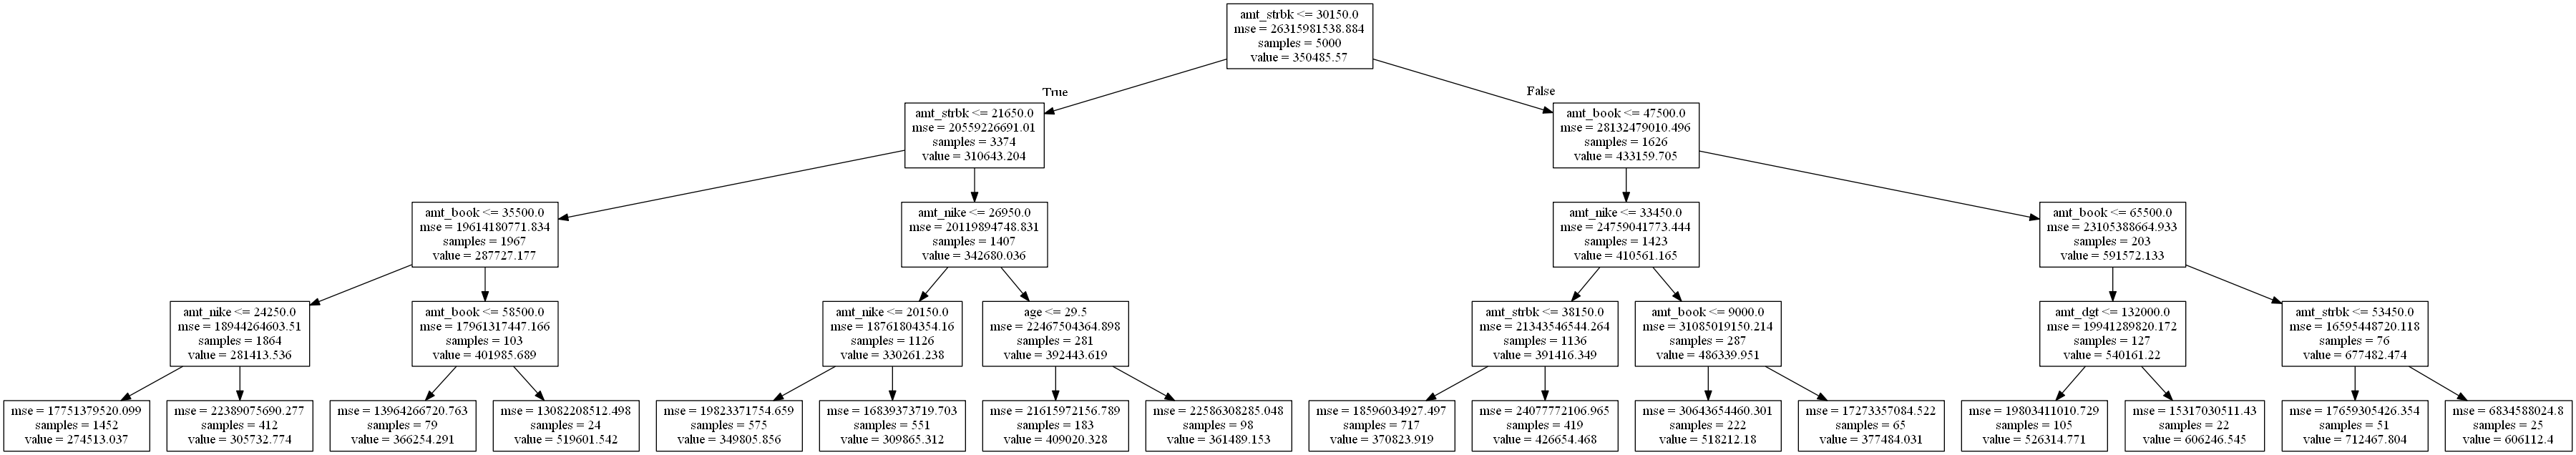

In [17]:
# bush tree

from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(min_samples_split=30, 
                            max_depth=4, 
                            min_samples_leaf=10, 
                            random_state=99)

dtfeatures = [elem for elem in list_feat if elem not in ['custid', 'cnt_pstyr', 'cnt_login', 'amt_nxtyr', 'cnt_nxtyr']]
tgt = 'amt_nxtyr'

dfdt = dfc21

dt1.fit(dfdt[dtfeatures], dfdt[tgt])

# path should have set
# or [ InvocationException: GraphViz's executables not found ] occur 
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Anaconda3\\Library\\bin\\graphviz'

from sklearn import tree
from IPython.display import Image  
import pydotplus, graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [18]:
# <TIP> [새탭에서 열기] (브라우저) 명령으로 트리 이미지를 새탭에서 열면 크게 보기 용이함

[ 추가 dataset]
- Medical Cost Personal Datasets
- Insurance Forecast using Linear Regression - https://www.kaggle.com/mirichoi0218/insurance 
- https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset

<font color='blue'><br>
- Credit Card Default Prediction dataset :: 
- https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/downloads/default-of-credit-card-clients-dataset.zip/1</font>
 

In [19]:
# Practice using Medical Cost Personal Dataset

dfi01 = pd.read_csv(dataPath + 'insurance_charge.csv')
print(dfi01.shape)
dfi01.head()


(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


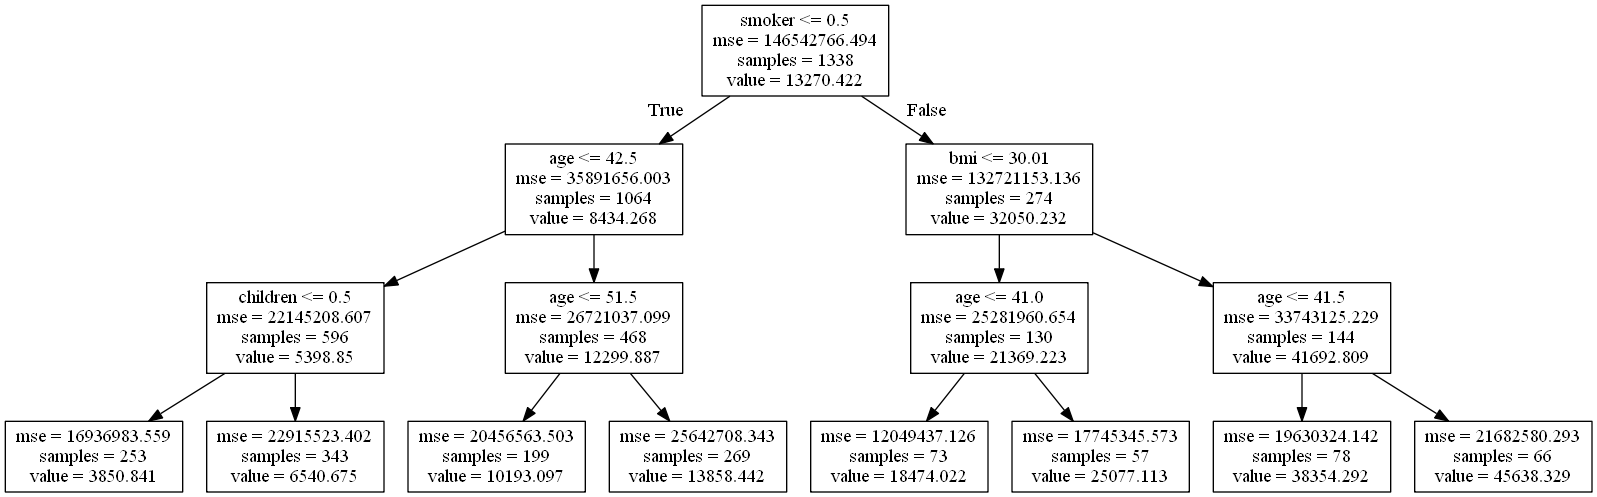

In [20]:
from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(min_samples_split=30, max_depth=3, min_samples_leaf=10, random_state=99)


dtfeatures = ['age', 'sex', 'bmi', 'children', 'smoker']
tgt = 'charges'

dfdt = dfi01.copy()

# 카테고리형 변수를 수치형 변수로 코딩 변경
dfdt['sex'] = np.where(dfdt.sex=='male',1,0)
# 남성은 1, 여성은 0 수치형으로 변경
dfdt['smoker'] = np.where(dfdt.smoker=='yes',1,0)

dt1.fit(dfdt[dtfeatures], dfdt[tgt])

# 트리 이미지 생성
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Anaconda3\\Library\\bin\\graphviz'

from sklearn import tree
from IPython.display import Image  
import pydotplus, graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

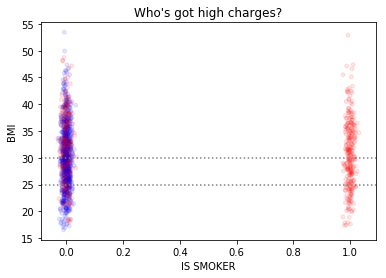

In [21]:
colors1 = ['red' if x > dfdt.charges.median() else 'blue' for x in dfdt.charges]
plt.scatter(rjitt(dfdt.smoker), rjitt(dfdt.bmi), alpha=0.1, s=15,
           color=colors1)
plt.xlabel('IS SMOKER')
plt.ylabel('BMI') # Body Mass Index 
plt.title("Who's got high charges?")
plt.axhline(30, color='grey', linestyle=':')
plt.axhline(25, color='grey', linestyle=':')
plt.show()

- BMI 25.0–29.9 : Over-weight
- BMI 30.0+ : Obese (for adults)
- [BMI 설명 페이지 - 계산기 포함 ] https://www.medicalnewstoday.com/articles/323622.php 


### Random Forests

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   10.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


r-squared : 0.839312225061305


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.7s finished


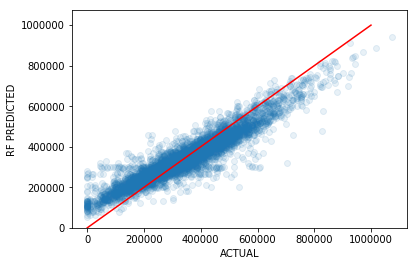

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training MAE:  49229.2125198158


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.8s finished


In [22]:
dtfeatures = [elem for elem in list_feat if elem not in ['custid', 'cnt_pstyr', 'cnt_login', 'amt_nxtyr', 'cnt_nxtyr']]
tgt = 'amt_nxtyr'
dfdt = dfc21


from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=1000, random_state=99,
                                  oob_score=True, verbose=1)
regressor.fit(dfdt[dtfeatures], dfdt[tgt])
print('r-squared :', regressor.score(dfdt[dtfeatures], dfdt[tgt], sample_weight=None))

y_pred = regressor.predict(dfdt[dtfeatures])

plt.scatter(dfdt[tgt],y_pred, alpha=0.1)
plt.ylim(0,dfdt[tgt].max())
plt.xlabel('ACTUAL')
plt.ylabel('RF PREDICTED')
plt.plot([0,1000000], [0,1000000], color='red')
plt.show()

# Compute MAE
y_rf_pred = regressor.predict(dfdt[dtfeatures])
print('Training MAE: ', np.mean(np.abs(dfdt[tgt] - y_rf_pred)))

- 이상적인 fitting line (red)와 영역별 얼마간 차이 발생
- Actual이 큰 구간에서 약간 작은 값을 predict

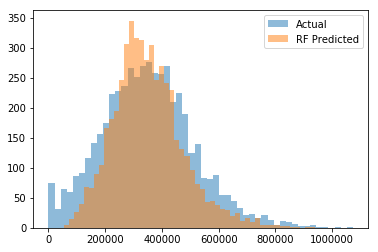

In [23]:
plt.hist(dfdt[tgt], bins=50, alpha=0.5)
plt.hist(y_pred, bins=50, alpha=0.5)
plt.legend(['Actual', 'RF Predicted'])
plt.show()

### CatBoost

In [24]:
from catboost import CatBoostRegressor

print(dfdt.columns)

cbmodel = CatBoostRegressor(iterations=1000, learning_rate=1,
                            eval_metric='R2', # [ RMSE , R2 ]
                            loss_function='RMSE',
                            use_best_model=True,
                            random_seed=0,
                            # max_depth=4, 
                            depth=6,
                            bagging_temperature = 0.2,
                            metric_period = 25)

dfdt = dfc21.copy()                               
train_x = dfdt[dtfeatures] 
tgt = 'amt_nxtyr'
train_y = dfdt[tgt]

cbmodel.fit(
    train_x, train_y,
    # cat_features=categorical_features_indices,
    # verbose=True,  # you can uncomment this for text output
    plot=True, # NOTE: does not work for classifier
    eval_set=(train_x, train_y)    
)



Index(['custid', 'age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
       'amt_book', 'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login',
       'amt_nxtyr', 'cnt_nxtyr'],
      dtype='object')


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1248958	test: 0.1248958	best: 0.1248958 (0)	total: 90.1ms	remaining: 1m 30s
25:	learn: 0.3094225	test: 0.3094225	best: 0.3094225 (25)	total: 766ms	remaining: 28.7s
50:	learn: 0.3363588	test: 0.3363588	best: 0.3363588 (50)	total: 1.46s	remaining: 27.2s
75:	learn: 0.3414745	test: 0.3414745	best: 0.3414745 (75)	total: 2.05s	remaining: 24.9s
100:	learn: 0.3550364	test: 0.3550364	best: 0.3550364 (100)	total: 2.69s	remaining: 24s
125:	learn: 0.3678969	test: 0.3678969	best: 0.3678969 (125)	total: 3.35s	remaining: 23.2s
150:	learn: 0.3753144	test: 0.3753144	best: 0.3753144 (150)	total: 4.04s	remaining: 22.7s
175:	learn: 0.3779510	test: 0.3779510	best: 0.3779510 (175)	total: 4.79s	remaining: 22.4s
200:	learn: 0.3787320	test: 0.3787320	best: 0.3787320 (200)	total: 5.52s	remaining: 21.9s
225:	learn: 0.3797087	test: 0.3797087	best: 0.3797087 (225)	total: 6.17s	remaining: 21.1s
250:	learn: 0.3804000	test: 0.3804000	best: 0.3804000 (250)	total: 7.22s	remaining: 21.5s
275:	learn: 0.380798

<Figure size 432x288 with 0 Axes>

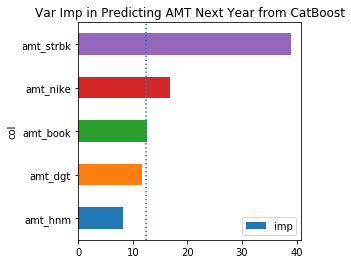

,col,imp,cum_sum_imp
3,amt_strbk,38.91,38.91
1,amt_nike,16.91,55.82
5,amt_book,12.62,68.44
4,amt_dgt,11.61,80.05
2,amt_hnm,8.20,88.25
row_total,amt_hnmamt_dgtamt_bookamt_nikeamt_strbk,88.25,NaN


In [25]:
# Mapping Feature Importance

plt.figure()
fea_imp = pd.DataFrame({'imp': cbmodel.feature_importances_, 'col': train_x.columns})
fea_imp['imp'] = round(fea_imp.imp, 2)
mean_vimp = fea_imp.imp.mean()
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-5:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(4, 4))
plt.title('Var Imp in Predicting AMT Next Year from CatBoost')
plt.axvline(mean_vimp, linestyle=':')
plt.show()

fea_imp1 = fea_imp.sort_values('imp', ascending=False)

# add row total
fea_imp1['cum_sum_imp']= round(fea_imp1['imp'].cumsum(),2)
fea_imp1.loc['row_total'] = fea_imp.apply(lambda x: x.sum())
fea_imp1

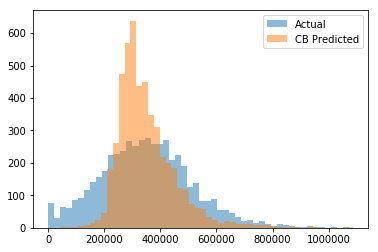

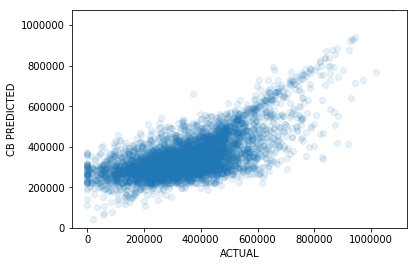

Training MAE:  93198.80197194802


In [26]:
y_cb_pred = cbmodel.predict(train_x)

plt.hist(train_y, bins=50, alpha=0.5)
plt.hist(y_cb_pred, bins=50, alpha=0.5)
plt.legend(['Actual', 'CB Predicted'])
plt.show()

plt.scatter(train_y, y_cb_pred, alpha=0.1)
plt.ylim(0,train_y.max())
plt.xlabel('ACTUAL')
plt.ylabel('CB PREDICTED')
plt.show()

# Compute MAE
y_cb_pred = cbmodel.predict(train_x)
print('Training MAE: ', np.mean(np.abs(train_y - y_cb_pred)))

#### 10 fold cross validation of Catboost

In [27]:
from catboost import Pool, cv

# cat_features = [0]

cv_dataset = Pool(data=train_x,
                  # cat_features=cat_features, 
                  label=train_y)
                  

params = {"iterations": 300,
          "depth": 3,
          "loss_function": "RMSE",
          "verbose": False}

scores = cv(cv_dataset,
            params,
            fold_count=10, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Supervised Predictive Modeling for Classification Problems

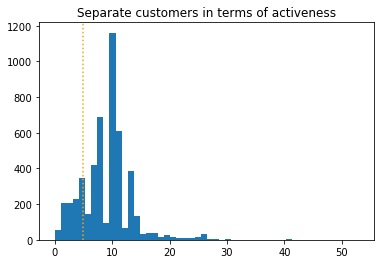

(1037, 13)

In [28]:
# check target distribution

plt.hist(dfc21.cnt_nxtyr, bins=50)
plt.axvline(5, color='orange', linestyle=':')
plt.title('Separate customers in terms of activeness')
plt.show()

dfc21[dfc21.cnt_nxtyr<=5].shape

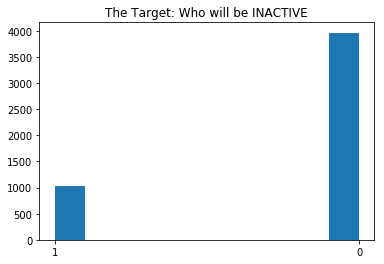

In [29]:
tgt_label_cnt = np.where(dfc21.cnt_nxtyr<=5, '1', '0')         
plt.hist(tgt_label_cnt)
plt.title('The Target: Who will be INACTIVE')
plt.show()

# predicting defection in terms of trx count in the next year

### Decision Tree Classifier

Count of nulls : 
 custid              0
age                 0
amt_nike            0
amt_hnm             0
amt_strbk           0
amt_dgt             0
amt_book            0
amt_htl             0
amt_prmmsneakers    0
cnt_pstyr           0
cnt_login           0
amt_nxtyr           0
cnt_nxtyr           0
dtype: int64


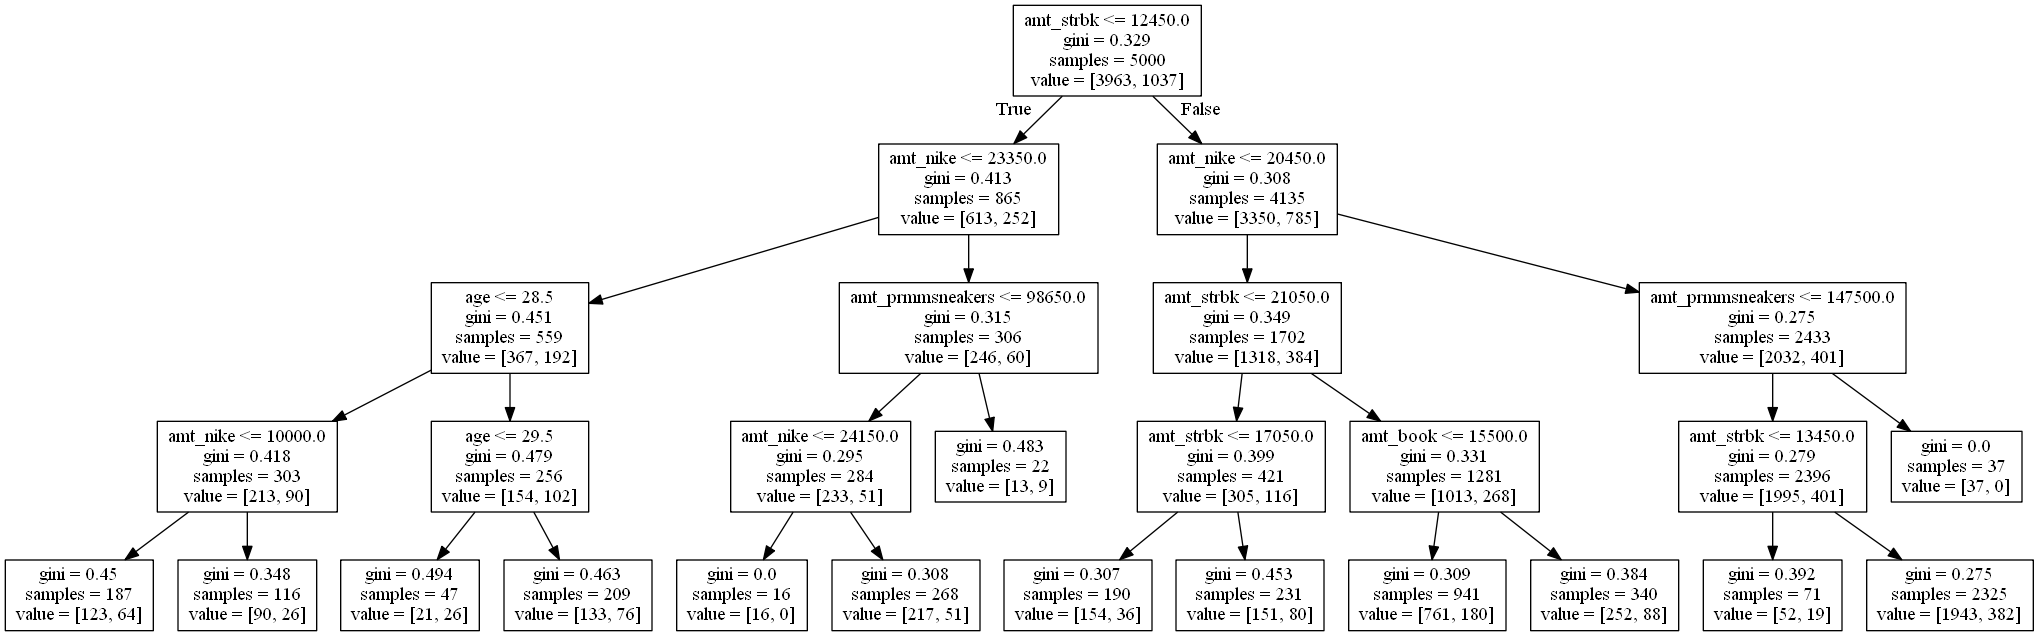

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(min_samples_split=30, max_depth=4, min_samples_leaf=10, random_state=99)

dtfeatures = [elem for elem in list_feat if elem not in ['custid', 'cnt_pstyr', 'cnt_login', 'amt_nxtyr', 'cnt_nxtyr']]
tgt = tgt_label_cnt

dfdt = dfc21

# Check if there is any missing value
print('Count of nulls : \n', dfdt.isnull().sum())

dt1.fit(dfdt[dtfeatures], tgt)

# path should have set
# or [ InvocationException: GraphViz's executables not found ] occur 
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Anaconda3\\Library\\bin\\graphviz'

from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [31]:
# inference and evaluate 

y_pred=dt1.predict(dfdt[dtfeatures])

# confusion matrix

# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(tgt, y_pred)
print('Confusion Matrix : \n', cnf_matrix)

accuracy = 100*(cnf_matrix[0][0] + cnf_matrix[1][1])/ cnf_matrix.sum()
print('\naccuracy % : ', accuracy)

# alternatively
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(tgt, y_pred) * 100
# print('accuracy % : ', accuracy)


Confusion Matrix : 
 [[3942   21]
 [1011   26]]

accuracy % :  79.36


# Use RF Classifier

In [32]:
# select numeric features only

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numcols = dfdt.select_dtypes(include=numerics).columns
dtfeatures = numcols.drop(['custid','amt_nxtyr', 'cnt_nxtyr'])
print(dtfeatures)
train_x = dfc21[dtfeatures]
train_y = tgt

# customerid and targets are to be eliminated from the predictor list


from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=500, random_state=0, verbose=2)
rfmodel.fit(train_x, train_y)
y_pred = rfmodel.predict(train_x)
y_pred[:10]

Index(['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book',
       'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login'],
      dtype='object')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


array(['1', '0', '1', '0', '0', '0', '0', '1', '1', '1'], dtype='<U1')

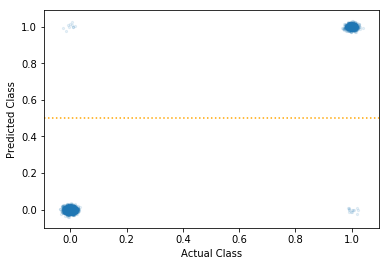

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[[0.358      0.642     ]
 [0.966      0.034     ]
 [0.23033333 0.76966667]
 [0.91336667 0.08663333]]


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


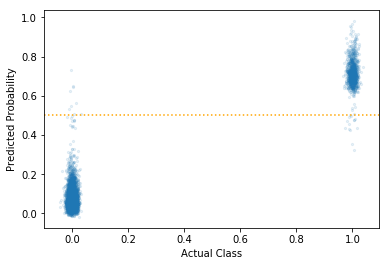

In [33]:
plt.scatter(rjitt(np.array(train_y).astype(int)), rjitt(np.array(y_pred).astype(int)), alpha=0.1, s=5)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.axhline(0.5, color='orange', linestyle=':')
plt.show()

y_predp = rfmodel.predict_proba(train_x)
print(y_predp[:4])

plt.scatter(rjitt(np.array(train_y).astype(int)), rjitt(y_predp[:,1]), alpha=0.1, s=5)
plt.axhline(0.5, color='orange', linestyle=':')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Probability')
plt.show()


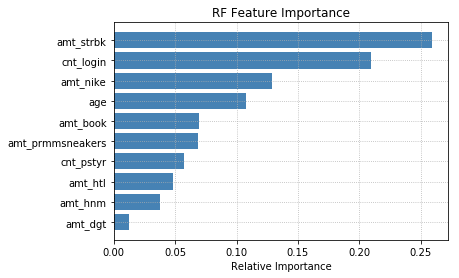

In [34]:
importances = rfmodel.feature_importances_
indices = np.argsort(importances)

plt.title('RF Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='steelblue', align='center')
plt.yticks(range(len(indices)), [dtfeatures[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(linestyle=':')
plt.show()

# Use Logistic Regression

['0' '0' '0' '0']
[[0.80488241 0.19511759]
 [0.80739794 0.19260206]
 [0.74349273 0.25650727]
 [0.65780355 0.34219645]]
[0.19511759 0.19260206 0.25650727 ... 0.1901413  0.20586005 0.09493221]


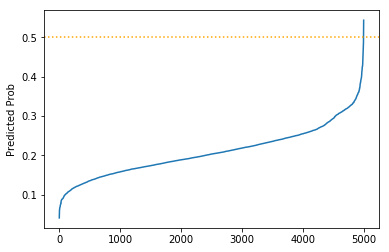

In [35]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(dfdt[dtfeatures], tgt)

y_pred = logreg.predict(dfdt[dtfeatures])
# predict probability
y_predprob=logreg.predict_proba(dfdt[dtfeatures])

# print predicted
print(y_pred[:4])
# print predicted
print(y_predprob[:4])
# print predicted prob of '1'
print(y_predprob[:,1])

plt.plot(np.sort(y_predprob[:,1]))
plt.axhline(0.5, color='orange', linestyle=':')
plt.ylabel('Predicted Prob')
plt.show()

In [36]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(tgt, y_pred)
print(cnf_matrix)

# alternatively
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(tgt, y_pred) * 100
print('accuracy % : ', accuracy)

[[3962    1]
 [1035    2]]
accuracy % :  79.28


### Checking Classifier Accuracy, ROC, AUC

Index(['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book',
       'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login'],
      dtype='object')
AUC: 0.59


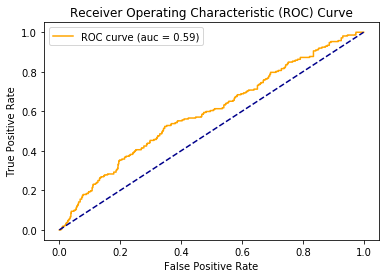

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
[[788   0]
 [212   0]]
PCNT accuracy = 78.80 


In [37]:
from sklearn.datasets import make_classification
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
# calculate the fpr and tpr for all thresholds of the classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

trainX, testX, trainy, testy = train_test_split(dfdt[dtfeatures], tgt, test_size=0.2, random_state=1)

model = DecisionTreeClassifier(min_samples_split=40, max_depth=4, min_samples_leaf=10, random_state=99)
model = LogisticRegression()
model = RandomForestClassifier(n_estimators=500, random_state=0, min_samples_leaf=30)
# model = CatBoostClassifier(iterations=500, eval_metric='Accuracy', loss_function='CrossEntropy', depth=3, random_seed=42, verbose=False)
model.fit(trainX, trainy)

print(dtfeatures)

probs = model.predict_proba(testX)
preds = probs[:,1]

# preds = probs


auc = roc_auc_score(testy, preds)
print('AUC: %.2f' % auc)


def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC curve (auc = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = roc_curve(testy.astype(int), preds)    
plot_roc_curve(fpr, tpr)



# import the metrics class
from sklearn import metrics
print(model.predict(testX)[:10])

cnf_matrix = metrics.confusion_matrix(testy, model.predict(testX).astype(int).astype(str))
print(cnf_matrix)


accuracy = accuracy_score(testy, model.predict(testX).astype(int).astype(str)) * 100
print('PCNT accuracy = %0.2f ' % accuracy)

importances = rfmodel.feature_importances_
indices = np.argsort(importances)



- In CatBoost, min_data_in_leaf is a parameter for training not symmetric trees. 
- To use it you need to set tree growing strategy to other than Symmetric. Other growing policies are supported only on GPU now, we'll implement them on CPU at some point. 
- But in most cases default growing strategy works best, so you can try to use it.

### A case of CatBoost including Categorical Features (= mixed type)

Index(['Unnamed: 0', 'custid', 'sex', 'age', 'area', 'education', 'marital',
       'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book', 'amt_htl',
       'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login', 'amt_nxtyr', 'cnt_nxtyr'],
      dtype='object')
(5000, 16) 26
age                  int64
area                object
education           object
marital             object
amt_nike             int64
amt_hnm              int64
amt_strbk            int64
amt_dgt              int64
amt_book             int64
amt_htl              int64
amt_prmmsneakers     int64
cnt_pstyr            int64
cnt_login            int64
dtype: object
[1 2 3]
0:	learn: 0.7947500	total: 47.9ms	remaining: 47.9s
50:	learn: 0.7937500	total: 1.83s	remaining: 34s
100:	learn: 0.7940000	total: 3.66s	remaining: 32.6s
150:	learn: 0.7942500	total: 5.22s	remaining: 29.4s
200:	learn: 0.7950000	total: 6.73s	remaining: 26.8s
250:	learn: 0.7952500	total: 8.09s	remaining: 24.1s
300:	learn: 0.7955000	total: 9.31s	remaining: 21.

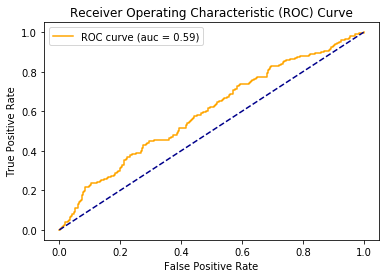

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Confusion Matrix :
 [[785   3]
 [211   1]]
PCNT accuracy = 78.60 


In [44]:
from sklearn.datasets import make_classification
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
# calculate the fpr and tpr for all thresholds of the classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

print(dfc20.columns)
list_featc = ['custid','age','area', 'education', 'marital', 'amt_nike', 'amt_hnm',
             'amt_strbk','amt_dgt','amt_book','amt_htl', 'amt_prmmsneakers', 
             'cnt_pstyr', 'cnt_login',
             'amt_nxtyr', 'cnt_nxtyr']
dfc23 = dfc20[dfc20.sex=='F'][list_featc]
print(dfc23.shape, len(tgt))

dfdt = dfc23.copy()
tgt = tgt_label_cnt


dtfeatures = ['age','area', 'education', 'marital', 'amt_nike', 'amt_hnm',
             'amt_strbk','amt_dgt','amt_book','amt_htl', 'amt_prmmsneakers', 
             'cnt_pstyr', 'cnt_login']

categorical_features_indices = np.where(dfdt[dtfeatures].dtypes ==np.object)[0]
print(dfdt[dtfeatures].dtypes)
print(categorical_features_indices)

# print(dfdt[dtfeatures].head(), dfdt[dtfeatures].tail())

# Partitioning
trainX, testX, trainy, testy = train_test_split(dfdt[dtfeatures], tgt, test_size=0.2, random_state=1)

cbmodel = CatBoostClassifier(iterations=1000, eval_metric='Accuracy', 
                           # loss_function='CrossEntropy', 
                           depth=6, random_seed=42, 
                          metric_period = 50)
cbmodel.fit(trainX, trainy, cat_features=categorical_features_indices)

print(dtfeatures)

probs = cbmodel.predict_proba(testX)
preds = probs[:,1]

# preds = probs


auc = roc_auc_score(testy, preds)
print('AUC: %.3f' % auc)


def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC curve (auc = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = roc_curve(testy.astype(int), preds)    
plot_roc_curve(fpr, tpr)



# import the metrics class
from sklearn import metrics
print(cbmodel.predict(testX)[:10])

cnf_matrix = metrics.confusion_matrix(testy, cbmodel.predict(testX).astype(int).astype(str))
print('\nConfusion Matrix :\n', cnf_matrix)

accuracy = accuracy_score(testy, cbmodel.predict(testX).astype(int).astype(str)) * 100
print('PCNT accuracy = %0.2f ' % accuracy)


<Figure size 432x288 with 0 Axes>

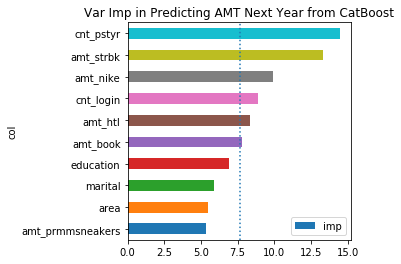

,col,imp,cum_sum_imp
11,cnt_pstyr,14.49,14.49
6,amt_strbk,13.31,27.80
4,amt_nike,9.90,37.70
12,cnt_login,8.90,46.60
9,amt_htl,8.32,54.92
8,amt_book,7.77,62.69
2,education,6.89,69.58
3,marital,5.90,75.48
1,area,5.48,80.96
10,amt_prmmsneakers,5.37,86.33


In [39]:
# Mapping Feature Importance of Mixted Type CatBoost

plt.figure()
fea_imp = pd.DataFrame({'imp': cbmodel.feature_importances_, 'col': dtfeatures})
fea_imp['imp'] = round(fea_imp.imp, 2)
mean_vimp = fea_imp.imp.mean()
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-10:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(4, 4))
plt.title('Var Imp in Predicting AMT Next Year from CatBoost')
plt.axvline(mean_vimp, linestyle=':')
plt.show()

fea_imp1 = fea_imp.sort_values('imp', ascending=False)

# add row total
fea_imp1['cum_sum_imp']= round(fea_imp1['imp'].cumsum(),2)
fea_imp1.loc['row_total'] = fea_imp.apply(lambda x: x.sum())
fea_imp1

### Encoding Categorical Features in ML
- feature engineering 단계에서 매우 중요한 부분인 인코딩은 categorical feature를 수치형으로 변환해서 모델에 투입하기 위해 실시
- 여러 가능한 방식이 있으나<br><br>

- Ordinal : 값의 크기를 기준으로 순서를 부여해서 수치화
- One-Hot : 각 카테고리 인지 여부를 dummy variable 형태로 추가
- Binary : 특정 기준에 부합하는지 여부로 이분법으로 구분하는 변수 추가
- Target Encoding : 타겟 변수의 값에 대한 대표값(예: 수치형 타겟이면 평균, 카테고리형 타겟이면 특정카테고리의 비율)을 나타내는 변수를 추가


In [47]:
# prepare a copied subset of dfdt

dfenc = dfdt.copy()

print(dfenc.columns)
dfenc1 = dfenc[['marital', 'area', 'education']]
dfenc1.head()

# Target Encoding Area

dfenc1['tgt'] = tgt.astype(int)
dfenc1.head()
dfn001 = dfenc1[['area','tgt']].groupby('area').mean().reset_index()
dfn001.columns = ['area', 'tgt_encoded_area']
dfn001.head()

Index(['custid', 'age', 'area', 'education', 'marital', 'amt_nike', 'amt_hnm',
       'amt_strbk', 'amt_dgt', 'amt_book', 'amt_htl', 'amt_prmmsneakers',
       'cnt_pstyr', 'cnt_login', 'amt_nxtyr', 'cnt_nxtyr'],
      dtype='object')


,area,tgt_encoded_area
0,GYNG,0.189000
1,INCN,0.208000
2,SEOL,0.213333


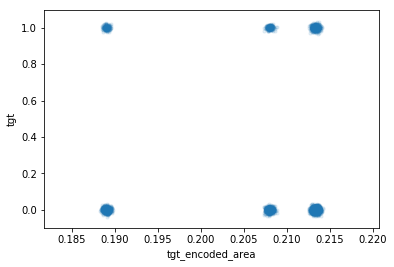

0.023256039363531312


In [64]:
dfenc2 = dfenc.merge(dfn001, on='area', how='left')

plt.scatter(rjitt(dfenc2.tgt_encoded_area), rjitt(tgt.astype(int)),
           alpha=0.1, s=10)
plt.xlabel('tgt_encoded_area')
plt.ylabel('tgt')
plt.show()

print(np.corrcoef(dfenc2.tgt_encoded_area, tgt.astype(int))[0,1])

In [70]:
# Ordinal Encoding Education

dfenc1['tgt'] = tgt.astype(int)
dfenc1.head()

list_education = list(dfenc1.education.unique())
list_education_ord = [2,1,3,4]
dfn001 = pd.DataFrame({'education':list_education,
             'ord_encoded_education': list_education_ord})

dfn001.head()

,education,ord_encoded_education
0,university,2
1,college,1
2,master,3
3,phd,4


In [87]:
# Binary Encoding Education

# Encoding Rule = [ 1 if advanced degree else 0 ]

dfenc1['tgt'] = tgt.astype(int)
dfenc1.head()

list_education = list(dfenc1.education.unique())
list_education_bnr = [0,0,1,1]
dfn001 = pd.DataFrame({'education':list_education,
             'bnr_encoded_education': list_education_bnr})

dfn001.head()

,bnr_encoded_education,education
0,0,university
1,0,college
2,1,master
3,1,phd


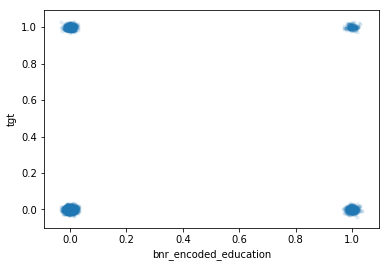

-0.016242881420704378


In [88]:
dfenc4 = dfenc3.merge(dfn001, on='education', how='left')

plt.scatter(rjitt(dfenc4.bnr_encoded_education), rjitt(tgt.astype(int)),
           alpha=0.1, s=10)
plt.xlabel('bnr_encoded_education')
plt.ylabel('tgt')
plt.show()

print(np.corrcoef(dfenc4.bnr_encoded_education, tgt.astype(int))[0,1])

age                        int64
area                      object
education                 object
marital                   object
amt_nike                   int64
amt_hnm                    int64
amt_strbk                  int64
amt_dgt                    int64
amt_book                   int64
amt_htl                    int64
amt_prmmsneakers           int64
cnt_pstyr                  int64
cnt_login                  int64
tgt_encoded_area         float64
ord_encoded_education      int64
bnr_encoded_education      int64
dtype: object
[1 2 3]
0:	learn: 0.7937500	test: 0.7725000	best: 0.7725000 (0)	total: 54.9ms	remaining: 1m 49s
50:	learn: 0.7934375	test: 0.7725000	best: 0.7725000 (0)	total: 4.42s	remaining: 2m 49s
100:	learn: 0.7934375	test: 0.7725000	best: 0.7725000 (0)	total: 9.3s	remaining: 2m 54s
150:	learn: 0.7934375	test: 0.7725000	best: 0.7725000 (0)	total: 14.4s	remaining: 2m 56s
200:	learn: 0.7934375	test: 0.7725000	best: 0.7725000 (0)	total: 19.1s	remaining: 2m 50s
250:	lea

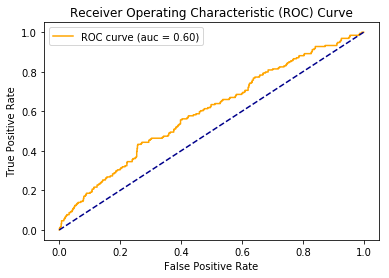

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Confusion Matrix :
 [[801   5]
 [189   5]]
PCNT accuracy = 80.60 


In [268]:
from sklearn.datasets import make_classification
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier


dfdt = dfenc4.copy()
tgt = tgt_label_cnt

# 'area', 'education', 
dtfeatures = ['age', 'area', 'education', 'marital', 'amt_nike', 'amt_hnm',
             'amt_strbk','amt_dgt','amt_book','amt_htl', 'amt_prmmsneakers', 
             'cnt_pstyr', 'cnt_login', 
              'tgt_encoded_area', 'ord_encoded_education', 'bnr_encoded_education']

categorical_features_indices = np.where(dfdt[dtfeatures].dtypes ==np.object)[0]
print(dfdt[dtfeatures].dtypes)
print(categorical_features_indices)

# print(dfdt[dtfeatures].head(), dfdt[dtfeatures].tail())

# Partitioning
trainX, testX, trainy, testy = train_test_split(dfdt[dtfeatures], tgt, test_size=0.2, random_state=13)
trainX, valX, trainy, valy = train_test_split(trainX, trainy, test_size=0.2, random_state=13)

cbmodel = CatBoostClassifier(iterations=2000, eval_metric='Accuracy', 
                             random_seed=9, 
                             use_best_model=True,
                             loss_function='MultiClass', # ['Logloss', 'MultiClass']
                             depth=9, 
                             l2_leaf_reg = 0.5, # l2_leaf_reg - default 3.0 보다 줄이면 좀 더 정밀한 탐색
                             metric_period = 50)
            
cbmodel.fit(trainX, trainy, cat_features=categorical_features_indices,
           eval_set=(valX, valy))

print(dtfeatures)

probs = cbmodel.predict_proba(testX)
preds = probs[:,1]

# preds = probs



def plot_roc_curve(fpr, tpr, testy, preds):
    auc = roc_auc_score(testy, preds)
    print('AUC: %.3f' % auc)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (auc = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = roc_curve(testy.astype(int), preds)    
plot_roc_curve(fpr, tpr, testy, preds)



# import the metrics class
from sklearn import metrics
print(cbmodel.predict(testX)[:10])

cnf_matrix = metrics.confusion_matrix(testy, cbmodel.predict(testX).astype(int).astype(str))
print('\nConfusion Matrix :\n', cnf_matrix)

accuracy = accuracy_score(testy, cbmodel.predict(testX).astype(int).astype(str)) * 100
print('PCNT accuracy = %0.2f ' % accuracy)


- 대칭형 트리를 구성하는 방식을 사용하기에 catboost가 inference(scoring)에서는 빠를 수 있으나 학습에서는 오히려 더 오래 걸릴 수 있음

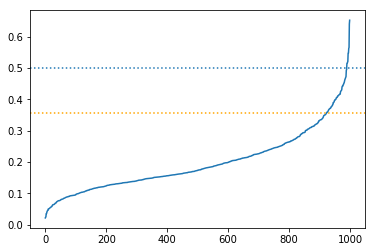

[0.65274919 0.64072855 0.56604384 0.56265332 0.54759516 0.54712687
 0.52128114 0.51806455 0.51544998 0.51495163]

Confusion Matrix :
 [[756  50]
 [168  26]]
PCNT accuracy = 78.20 


In [269]:
# 1로 예측된 경우가 적은 이유는 Tree 기반의 모델이기 때문
# leaf의 samplesize를 줄여 조절하거나 Score의 분포를 변경시키는 방식등 활용 가능

adj_key = 1.4
plt.plot(np.sort(preds))
plt.axhline(0.5, linestyle=':')
plt.axhline(0.5 * (1/adj_key), linestyle=':', color='orange')
plt.show()

print(-np.sort(-preds)[:10])

# print((cbmodel.predict_proba(testX) * adj_key)[:10,1])
pred_ = (cbmodel.predict_proba(testX) * adj_key)[:,1]
pred_ = np.where(pred_ >0.5, '1','0')


cnf_matrix = metrics.confusion_matrix(testy, pred_)
print('\nConfusion Matrix :\n', cnf_matrix)

accuracy = accuracy_score(testy, pred_) * 100
print('PCNT accuracy = %0.2f ' % accuracy)

- 1천명 고객 중 이용이 크게 감소할 고객으로 0.5 기준에서 5명, 조절한 낮은 기준 기준으로 28명이 정확히 포착된다고 한다면, 28명을 포착하는 것이 5명만 (좀 더 정확하게) 포착하는 것 보다 중요할 수 있음 (업무적 판단 필요)
- 기준이상의 고객에게 이용감소를 방지하기 위한 목적으로 선물을 준다고 했을때 대상이 증가하는 만큼 비용도 증가. 그 증가를 감수할 것인가에 대한 판단이 필요한 것
- 결국, 생성된 결과를 바탕으로 어떤 Action을 취할 것인가에 따라 다른 판단 필요

<Figure size 432x288 with 0 Axes>

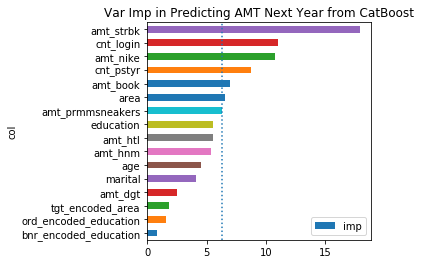

,col,imp,cum_sum_imp
6,amt_strbk,17.94,17.94
12,cnt_login,11.05,28.99
4,amt_nike,10.80,39.79
11,cnt_pstyr,8.76,48.55
8,amt_book,6.95,55.50
1,area,6.52,62.02
10,amt_prmmsneakers,6.26,68.28
2,education,5.52,73.80
9,amt_htl,5.49,79.29
5,amt_hnm,5.39,84.68


In [245]:
# Mapping Feature Importance of Mixted Type CatBoost

plt.figure()
fea_imp = pd.DataFrame({'imp': cbmodel.feature_importances_, 'col': dtfeatures})
fea_imp['imp'] = round(fea_imp.imp, 2)
mean_vimp = fea_imp.imp.mean()
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(4, 4))
plt.title('Var Imp in Predicting AMT Next Year from CatBoost')
plt.axvline(mean_vimp, linestyle=':')
plt.show()

fea_imp1 = fea_imp.sort_values('imp', ascending=False)

# add row total
fea_imp1['cum_sum_imp']= round(fea_imp1['imp'].cumsum(),2)
fea_imp1.loc['row_total'] = fea_imp.apply(lambda x: x.sum())
fea_imp1

### Test Run RF with Encoded Features

Index(['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book',
       'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login',
       'tgt_encoded_area', 'ord_encoded_education', 'bnr_encoded_education'],
      dtype='object')
['0' '0' '1' '0' '0' '0' '0' '0' '0' '0']
[[804   2]
 [192   2]]
accuracy % :  80.60000000000001


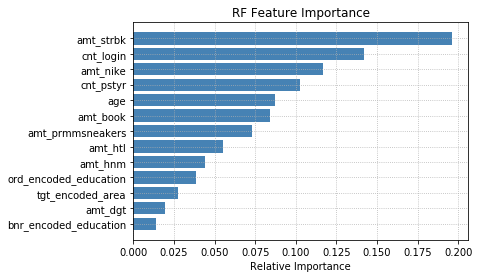

AUC: 0.890


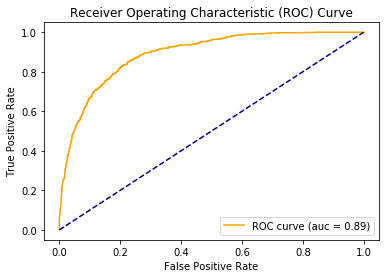

 [ Test Set ROC Chart ] 
AUC: 0.584


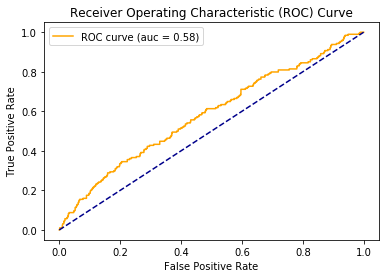

In [267]:
# select numeric features only

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numcols = dfenc4.select_dtypes(include=numerics).columns
dtfeatures = numcols.drop(['custid','amt_nxtyr', 'cnt_nxtyr'])
# optional to exclude encoded categorical features
# dtfeatures = dtfeatures.drop(['ord_encoded_education' , 'bnr_encoded_education' , 'tgt_encoded_area'])
print(dtfeatures)

# Partitioning
trainX, testX, trainy, testy = train_test_split(dfenc4[dtfeatures], tgt, test_size=0.2, random_state=13)



from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=2000, random_state=13, verbose=0,
                                max_depth=12, min_samples_split=12, min_samples_leaf=3)
rfmodel.fit(trainX, trainy)
y_pred = rfmodel.predict(testX)
print(y_pred[:10])

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(testy, y_pred)
print(cnf_matrix)

# alternatively
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(testy, y_pred) * 100
print('accuracy % : ', accuracy)


# Feature Implotance Plot

importances = rfmodel.feature_importances_
indices = np.argsort(importances)

plt.title('RF Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='steelblue', align='center')
plt.yticks(range(len(indices)), [dtfeatures[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(linestyle=':')
plt.show()

# ROC and AUC
probs = rfmodel.predict_proba(trainX)
preds = probs[:,1]

fpr, tpr, thresholds = roc_curve(trainy.astype(int), preds) 
plot_roc_curve(fpr, tpr, trainy, preds)

# for test set
probs = rfmodel.predict_proba(testX)
preds = probs[:,1]

fpr, tpr, thresholds = roc_curve(testy.astype(int), preds) 
print(' [ Test Set ROC Chart ] ')
plot_roc_curve(fpr, tpr, testy, preds)


- 모델이 완성된 후 운영(Deployment)을 위해서는 모델을 저장했다가 불러서 Scoring (predict) 실행해야할 수 있음
- CatBoost Model : SAVE model and reload : https://catboost.ai/docs/concepts/python-usages-examples.html


### Predictive (Supervised) 모델링 Process [Review]
- 데이터 준비 - 타겟, input feature (+derived)
- initial test modeling
- 기본탐색 + feature engineering (+encoding)
- 모델링용 dataset Partitioning (train, validation, test)
- 모델링 - 복수 기법, 옵션 적용
- 모델평가 (+ scrore profiling + cross validation)
- Deployment

### Credit Card Default Prediction

[ 추가 dataset]
- Credit Card Default Prediction dataset :: 
- [dataset description ] https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/ 
- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
- https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/downloads/default-of-credit-card-clients-dataset.zip/1
 

(30000, 25)


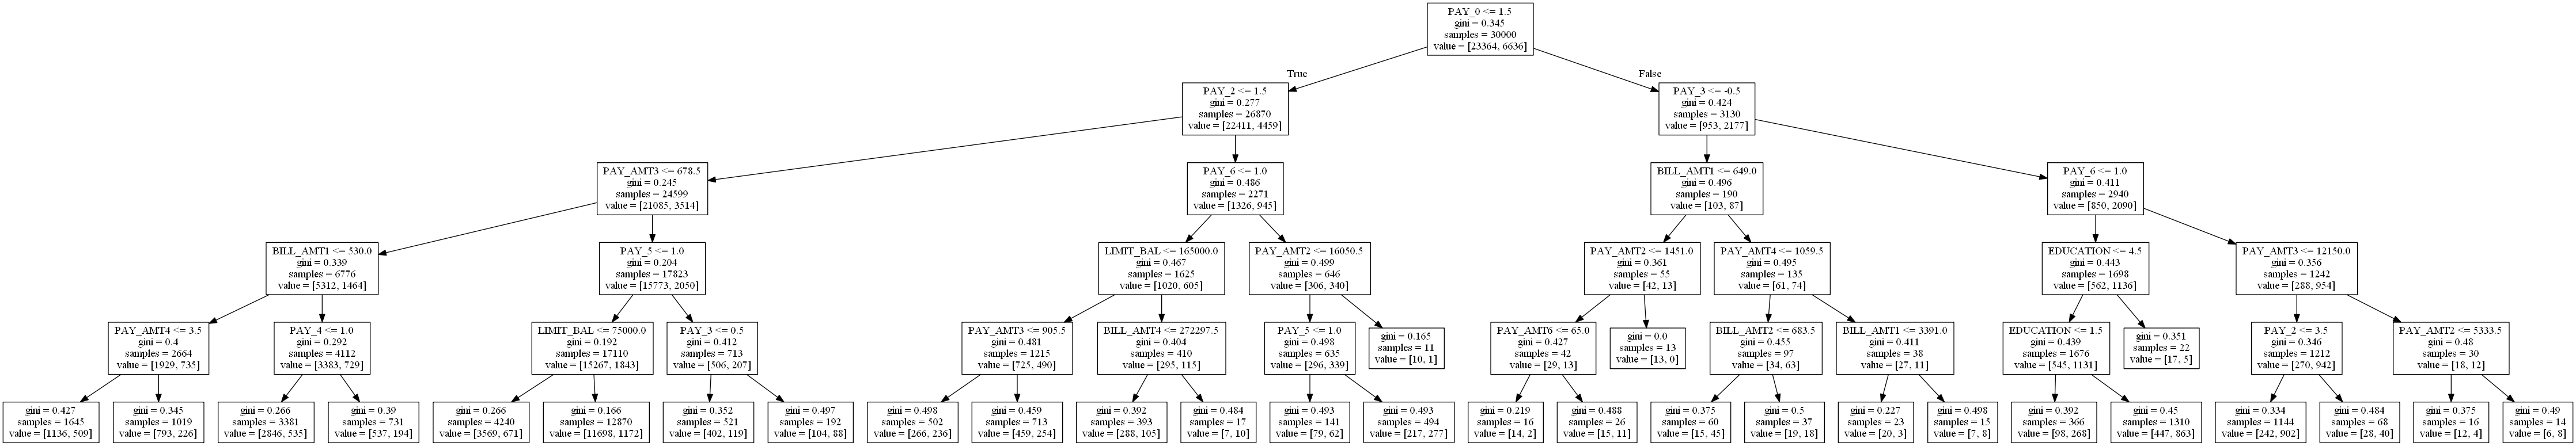

In [41]:
dfcr01 = pd.read_csv(dataPath + 'UCI_credit_card.csv')
print(dfcr01.shape)
dfcr01.head()


from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(min_samples_split=30, 
                             max_depth=5, 
                             min_samples_leaf=10, 
                             random_state=99)


# dtfeatures = np.array(dfcr01.columns).drop(['ID', 'default.payment.next.month'])
cols = dfcr01.columns
dtfeatures = [x for x in cols if x not in ['ID', 'default.payment.next.month']]
tgt = 'default.payment.next.month'

dfdt = dfcr01.copy()

# 카테고리형 변수를 수치형 변수로 코딩 변경 (인코딩)

dt1.fit(dfdt[dtfeatures], dfdt[tgt])

# path should have set
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Anaconda3\\Library\\bin\\graphviz'

from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())